##Web Scrap Projet##

This the webs craping project. This works scraped the website 'https://datascience.codata.org/articles/' to identify the hottest topics of data science research papers, the number of papes per volumne of journal over years from 2003, the average number of publications per person, the number of publications per person, and the most active research place. 

The scraped raw data "articles_02.csv" has column of type of peper, author, date, email, keywords, and title. 
There are two columns of keywords due to the change of structure of paper after year 2013. The data cleaning process can be summarized as below:
    1. The published date is converted to the date time format. 
    2. The keyword columns are merged into one column called "new keyword."
    3. The original two keyword columns are deleted. 
    4. Any rows with emtpy columns were deleted. 

Import numpy and pandas: Load the file "article_02.csv":

In [2144]:
import numpy as np
import pandas as pd

In [2165]:
data = pd.read_csv('articles_02.csv')

In [2166]:
data.head()

,keyword,type,date,author,email,keyword2,title
0,NaN,Proceedings Papers,26 Feb 2003,"Dorothy M Blakeslee,John Rumble, Jr.",mailto:dorothy.blakeslee@nist.gov,"Data, Database, Interface, Quality, Review, Sc...",The essentials of a database quality process
1,NaN,Research Papers,05 Jan 2006,"Gary J Hunter,Monica Wachowicz,Arnold K Bregt",mailto:garyh@unimelb.edu.au,"Spatial data, Usability, Usability elements, R...",Understanding Spatial Data Usability
2,NaN,Research Papers,05 Jan 2006,"Catharina Riedemann,Christian Timm",mailto:riedemann@ifgi.uni-muenster.de,"Data integration, System architecture, ISO, OG...",Services for data integration
3,NaN,Research Papers,28 Mar 2007,"Frank Dehne,Todd Eavis,Boyong Liang",mailto:frank@dehne.net,"OLAP, Data cube, Compressing, Parallel processing",Compressing Data Cube in Parallel OLAP Systems
4,NaN,Research Papers,29 Feb 2008,"Qingzhai Geng,Xingming Zhu,Jianan Cai",mailto:gengqzh@iwhr.com,"Water resources, Scientific data, Water resour...",Water Resources Scientific Data Sharing in China


Convert the date column into datetime format

In [2169]:
import datetime as dt
data['date'] =  pd.to_datetime(pd.Series(data['date']), format='%d %b %Y')

In [2170]:
data.shape

(610, 7)

In [2171]:
data['date'][0:5]

0   2003-02-26
1   2006-01-05
2   2006-01-05
3   2007-03-28
4   2008-02-29
Name: date, dtype: datetime64[ns]

Join two keyword columns into one column 'new keyword' by a funtion called 'str_join'
Delete keyword columns and arrange columns in the order of date, type, author, email, and new keyword.

In [2172]:
def str_join(df, sep, *cols):
    from functools import reduce
    return reduce(lambda x, y: x.astype(str).str.cat(y.astype(str), sep=sep), [df[col] for col in cols])

In [2173]:
data['new keyword']=str_join(data,' ,','keyword','keyword2')

In [2174]:
data.head()

,keyword,type,date,author,email,keyword2,title,new keyword
0,NaN,Proceedings Papers,2003-02-26,"Dorothy M Blakeslee,John Rumble, Jr.",mailto:dorothy.blakeslee@nist.gov,"Data, Database, Interface, Quality, Review, Sc...",The essentials of a database quality process,"nan ,Data, Database, Interface, Quality, Revie..."
1,NaN,Research Papers,2006-01-05,"Gary J Hunter,Monica Wachowicz,Arnold K Bregt",mailto:garyh@unimelb.edu.au,"Spatial data, Usability, Usability elements, R...",Understanding Spatial Data Usability,"nan ,Spatial data, Usability, Usability elemen..."
2,NaN,Research Papers,2006-01-05,"Catharina Riedemann,Christian Timm",mailto:riedemann@ifgi.uni-muenster.de,"Data integration, System architecture, ISO, OG...",Services for data integration,"nan ,Data integration, System architecture, IS..."
3,NaN,Research Papers,2007-03-28,"Frank Dehne,Todd Eavis,Boyong Liang",mailto:frank@dehne.net,"OLAP, Data cube, Compressing, Parallel processing",Compressing Data Cube in Parallel OLAP Systems,"nan ,OLAP, Data cube, Compressing, Parallel pr..."
4,NaN,Research Papers,2008-02-29,"Qingzhai Geng,Xingming Zhu,Jianan Cai",mailto:gengqzh@iwhr.com,"Water resources, Scientific data, Water resour...",Water Resources Scientific Data Sharing in China,"nan ,Water resources, Scientific data, Water r..."


In [2179]:
data1 = data[['date','type','author','email','new keyword']]

In [2180]:
data1.shape

(610, 5)

Delete rows with empty authors - It may be due to either large groups or has been published as a company's paper. 

In [2181]:
data1[25:30]

,date,type,author,email,new keyword
25,2009-10-24,Research Papers,"A Prysyazhnyuk,A Romanenko,N Gudzenko,M Fuzik,...",mailto:info@ubiquitypress.com,"nan ,Chernobyl accident, Recovery operations w..."
26,2009-10-24,Research Papers,NaN,mailto:info@ubiquitypress.com,"nan ,nan"
27,2009-10-24,Research Papers,NaN,mailto:info@ubiquitypress.com,"nan ,nan"
28,2009-10-24,Research Papers,Takashi Watanabe,mailto:c62d51ef58@yahoo.co.jp,"nan ,ICSU, WDC, WDS, World Data Center, Japan"
29,2009-10-24,Research Papers,NaN,mailto:info@ubiquitypress.com,"nan ,nan"


In [2182]:
data1=data1.dropna(how='any')

In [2183]:
data1[25:30]

,date,type,author,email,new keyword
25,2009-10-24,Research Papers,"A Prysyazhnyuk,A Romanenko,N Gudzenko,M Fuzik,...",mailto:info@ubiquitypress.com,"nan ,Chernobyl accident, Recovery operations w..."
28,2009-10-24,Research Papers,Takashi Watanabe,mailto:c62d51ef58@yahoo.co.jp,"nan ,ICSU, WDC, WDS, World Data Center, Japan"
31,2009-10-24,Research Papers,Y Hayakawa,mailto:hayakawa@cc.toin.ac.jp,"nan ,Origin of geomagnetism, Piezoelectricity,..."
32,2009-10-24,Research Papers,K Loganovsky,mailto:loganovsky@windowslive.com,"nan ,Ionizing radiation, Low doses, Chernobyl ..."
33,2009-10-24,Research Papers,"A Dmitriev,O Shevchenko,V Polischuk,N Guscha",mailto:dmyt@voliacable.com,"nan ,Chernobyl catastrophe, Low dose chronic r..."


In [2184]:
data1.shape

(592, 5)

# Author Data Analysis 

This analysis is done to identify the size of group per pape and we can see how authors are actively collaborates to each other.

In [2193]:
data1['author'][10]

'Jian Wang,Rui Chen'

In [2189]:
new_authors=[]
def column_test(data_column):
    authors_list = data_column.tolist()       ## Converts object to the list
  
    for index, el in enumerate(authors_list): ## Start the for-loop on author on each paper
        
        new_authors.append(authors_list[index].
                           replace(', ', ';').split(',')) ##Seperate authors by ',' into the list
        pd.DataFrame(new_authors)             ## Put each name into each paper as dataframe. 

In [2190]:
column_test(data1['author'])  ## Compile the column_test function and make all authors as elements per paper. 

In [2191]:
new_authors[10]  ## Print out the result

['Jian Wang', 'Rui Chen']

Count number of authors on each paper

In [1689]:
test = []
index = 0
name = 0

for index in range(len(new_authors)):  ## For-loop for paper. 
    paper_number = index+1             ## Paper Number

    for name in range(len(new_authors[index])):  ##For-loop to count the number of authors on each paper. 
        people = name +1               ## Author Number
    test.append((paper_number,people)) 
Author_number=pd.DataFrame(test, columns=["Paper_Number","Number"])  ##Save work as DataFrame

In [2194]:
Author_number[0:5]

,Paper_Number,Number
0,1,2
1,2,3
2,3,2
3,4,3
4,5,3


In [1691]:
Author_number.shape

(592, 2)

Make a histogram to show the distribution of papers by the number of authors per paper. 

In [2195]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('Number_Authors_per_Paper.pdf') as pdf:

    plt.figure(figsize=(10,10))
    Author_number.hist(column="Number",bins=25)
    plt.xlabel("Number of Author per Paper",fontsize=15)
    plt.ylabel("Number of Paper",fontsize=15)
    plt.title('Number of Authors')
    plt.xlim([0.0,30.0])
    pdf.savefig()
    plt.close()

In [1693]:
Author_number['Number'].describe()

count    592.000000
mean       3.236486
std        2.711413
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       24.000000
Name: Number, dtype: float64

This study shows that about 3+/-2 authors collaborate for a paper. Since 75% of papers are written by a group of <=4 authors. So I would like to look the rest 25% of papers by 6 or higher number of authors. 

In [2196]:
Author_number_filtered = Author_number.query('Number>=5')
Author_number_filtered.head()

,Paper_Number,Number
12,13,5
22,23,14
23,24,5
25,26,5
36,37,7


In [2197]:
with PdfPages('Number_Authors_5higher_Paper.pdf') as pdf:
    plt.figure(figsize=(10,10))
    Author_number_filtered.hist(column='Number')#, column="Number",bins=10)
    plt.xlabel("Number of Author per Paper",fontsize=15)
    plt.ylabel("Number of Paper",fontsize=15)
    plt.title('Number of Authors')
    plt.xlim([4,30.0])
    pdf.savefig()
    plt.close()

In [2198]:
Author_number_filtered['Number'].describe()

count    115.000000
mean       7.434783
std        3.319613
min        5.000000
25%        5.000000
50%        6.000000
75%        9.000000
max       24.000000
Name: Number, dtype: float64

I also tested the average number of papers per author. First, I count the number of papers per author. 

In [2199]:
author = []                               ## Make a list of authors 
for index in range(len(new_authors)):
    for authors in new_authors[index]:
        author.append(authors)

In [2200]:
temp_author=set(author)

result_author={}                         ## Make a dictionary of authors, paper number
for i in temp_author:
    result_author[i]=author.count(i)

#print(result_author)

In [2201]:
authors_paper = pd.Series(result_author, name='Paper')  ## Name the column name 'Paper'

In [2202]:
authors_paper.index.name = 'Name'  ## Name the index by author's name

In [2204]:
author_papers=pd.DataFrame(authors_paper) ## Make the dictionary as the dataframe

In [2205]:
author_papers.reset_index()  ## Reset the index

,Name,Paper
0,,1
1,A A Ediang,1
2,A Aparicio-González,1
3,A Asai,1
4,A Asgharzadeh,1
5,A Asserson,2
6,A Beaulieu,1
7,A Bernard,1
8,A Chambodut,3
9,A Dalto,1


In [2208]:
# Group 'author_papers' dataframe by the column 'Paper' 
# to count the number of authors by the number of publication. 
counts_Paper = pd.DataFrame(author_papers.groupby('Paper').size().rename('Author'))

In [2209]:
counts_Paper

,Author
Paper,
1,1416
2,155
3,29
4,11
5,9
6,1
8,1


In [2211]:
#Filter 'author_papers' by authors with 3 or more publications. 
author_papers_filtered = author_papers.query('Paper>=3')

In [2212]:
author_papers_filtered.describe()

,Paper
count,51.000000
mean,3.725490
std,1.040739
min,3.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,8.000000


In [2222]:
with PdfPages('Number_Papers_by_Author.pdf') as pdf:
    plt.figure(figsize=(10,10))
    author_papers_filtered.hist(column='Paper')#, column="Number",bins=10)
    plt.xlabel("Number of Paper",fontsize=15)
    plt.ylabel("Number of Authors",fontsize=15)
    plt.title('Number of Papers')
    plt.xlim([2,10.0])
    pdf.savefig()
    plt.close()


# Find Number of Papers Over Time

In [2224]:
data2=pd.DataFrame(data1, columns=['date','type'])

In [2234]:
counts_df = pd.DataFrame(data2.groupby('date').size().rename('Paper'))

In [2235]:
counts_df.describe()

,Paper
count,24.000000
mean,24.666667
std,6.349712
min,10.000000
25%,24.000000
50%,25.000000
75%,25.000000
max,50.000000


In [2238]:
counts_df.reset_index()

,date,Paper
0,2003-02-26,10
1,2006-01-05,50
2,2006-06-28,25
3,2007-03-28,23
4,2007-04-26,25
5,2007-06-29,25
6,2007-08-22,23
7,2007-10-10,25
8,2007-12-01,25
9,2008-02-29,25


In [2273]:
date_range = pd.date_range('2014-01-01', '2015-01-01', freq='MS')

with PdfPages('Number_Paper_Volumne.pdf') as pdf:
    plt.figure(figsize=(10,20))
    ax=counts_df.plot.bar();
    plt.xlabel("Published Date",fontsize=5)
    plt.ylabel("Number of Paper",fontsize=15)
    plt.title('Number of Published Papers per Volume')
    xtl=[item.get_text()[0:7] for item in ax.get_xticklabels()]
    _=ax.set_xticklabels(xtl)

    pdf.savefig()
    plt.close()   

# Keyword Studies

Using 'new keyword' column, the major topics in this journal were searched. 

In [2274]:
data1.head()

,date,type,author,email,new keyword
0,2003-02-26,Proceedings Papers,"Dorothy M Blakeslee,John Rumble, Jr.",mailto:dorothy.blakeslee@nist.gov,"nan ,Data, Database, Interface, Quality, Revie..."
1,2006-01-05,Research Papers,"Gary J Hunter,Monica Wachowicz,Arnold K Bregt",mailto:garyh@unimelb.edu.au,"nan ,Spatial data, Usability, Usability elemen..."
2,2006-01-05,Research Papers,"Catharina Riedemann,Christian Timm",mailto:riedemann@ifgi.uni-muenster.de,"nan ,Data integration, System architecture, IS..."
3,2007-03-28,Research Papers,"Frank Dehne,Todd Eavis,Boyong Liang",mailto:frank@dehne.net,"nan ,OLAP, Data cube, Compressing, Parallel pr..."
4,2008-02-29,Research Papers,"Qingzhai Geng,Xingming Zhu,Jianan Cai",mailto:gengqzh@iwhr.com,"nan ,Water resources, Scientific data, Water r..."


In [1863]:
## The list of list of new keyword contains string 'nan,' and it is necessary to remove the comma. 
## The string 'nan' can be removed. However, for the purpose of this study, I am selelcting the keywords 
## from the set of keywrords and find matching elements in the list. Therefore, remvoing 'nan' is not 
## very necessary. 

new_keyword=[]

def column_test(data_column):
    keyword_list = data_column.tolist()          ## Convert the object to list. 

    for index, el in enumerate(keyword_list):
        keyword = keyword_list[index].split(",") ## For elements in list of new keywords, split by ","
        
        for word in keyword:                     ## Put lists into new list 
            new_keyword.append(word)


    

In [1864]:
column_test(data1['new keyword'])

In [2354]:
import re

## Make list of keywords that contains 'data'
new_list=[x for x in data1['new keyword'] if re.search('data',x,re.IGNORECASE)]

temp=set(new_list)

result={}
for i in temp:
    result[i]=new_keyword.count(i)

## Count Numbers of Keywords
count_data = 1
for item in new_list:
    item='Data' 
    count_data = count_data+1
print(count_data)

354


In [2353]:
import re

#for element in new_keyword:
new_list_model=[x for x in data1['new keyword'] if re.search('model',x,re.IGNORECASE)]
new_list_model2=[x for x in data1['new keyword'] if re.search('monte carlo',x,re.IGNORECASE)]
new_list_model3=[x for x in data1['new keyword'] if re.search('simulation',x,re.IGNORECASE)]
new_list_model4=[x for x in data1['new keyword'] if re.search('statistic',x,re.IGNORECASE)]
new_list_model5=[x for x in data1['new keyword'] if re.search('spectr',x,re.IGNORECASE)]
new_list_model6=[x for x in data1['new keyword'] if re.search('analysis',x,re.IGNORECASE)]

new_list_model.extend(new_list_model2)
new_list_model.extend(new_list_model3)
new_list_model.extend(new_list_model4)
new_list_model.extend(new_list_model5)
new_list_model.extend(new_list_model6)

temp=set(new_list_model)

result_model={}
for i in temp:
    result_model[i]=new_keyword.count(i)


count_model = 1
for item in new_list_model:
    item='model' 
    count_model = count_model+1
print(count_model)

98


In [2355]:
import re
sub='data'
#for element in new_keyword:
new_list_science=[x for x in data1['new keyword'] if re.search('phys',x,re.IGNORECASE)]
new_list_science2=[x for x in data1['new keyword'] if re.search('bio',x,re.IGNORECASE)]
new_list_science3=[x for x in data1['new keyword'] if re.search('chem',x,re.IGNORECASE)]
new_list_science4=[x for x in data1['new keyword'] if re.search('geo',x,re.IGNORECASE)]
new_list_science5=[x for x in data1['new keyword'] if re.search('astro',x,re.IGNORECASE)]
new_list_science6=[x for x in data1['new keyword'] if re.search('math',x,re.IGNORECASE)]
new_list_science7=[x for x in data1['new keyword'] if re.search('tech',x,re.IGNORECASE)]
new_list_science8=[x for x in data1['new keyword'] if re.search('comput',x,re.IGNORECASE)]
new_list_science9=[x for x in data1['new keyword'] if re.search('science',x,re.IGNORECASE)]
new_list_science10=[x for x in data1['new keyword'] if re.search('software',x,re.IGNORECASE)]
new_list_science11=[x for x in data1['new keyword'] if re.search('medical',x,re.IGNORECASE)]
#for item in new_list:
    
#    print(item)
new_list_science.extend(new_list_science2)
new_list_science.extend(new_list_science3)
new_list_science.extend(new_list_science4)
new_list_science.extend(new_list_science5)
new_list_science.extend(new_list_science6)
new_list_science.extend(new_list_science7)
new_list_science.extend(new_list_science8)
new_list_science.extend(new_list_science9)
new_list_science.extend(new_list_science10)
new_list_science.extend(new_list_science11)
#print(new_list_science)
temp=set(new_list_science)

result_science={}
for i in temp:
    result_science[i]=new_keyword.count(i)

count_science = 1
for item in new_list_science:
    count_science = count_science+1
print(count_science)

265


In [2356]:
import re
sub='data'
#for element in new_keyword:
new_list_eco=[x for x in data1['new keyword'] if re.search('eco',x,re.IGNORECASE)]
new_list_eco2=[x for x in data1['new keyword'] if re.search('finance',x,re.IGNORECASE)]
new_list_eco3=[x for x in data1['new keyword'] if re.search('market',x,re.IGNORECASE)]
new_list_eco4=[x for x in data1['new keyword'] if re.search('bank',x,re.IGNORECASE)]
new_list_eco5=[x for x in data1['new keyword'] if re.search('society',x,re.IGNORECASE)]
new_list_eco6=[x for x in data1['new keyword'] if re.search('manage',x,re.IGNORECASE)]
new_list_eco7=[x for x in data1['new keyword'] if re.search('social',x,re.IGNORECASE)]

#for item in new_list:
    
#    print(item)
new_list_eco.extend(new_list_eco2)
new_list_eco.extend(new_list_eco3)
new_list_eco.extend(new_list_eco4)
new_list_eco.extend(new_list_eco5)
new_list_eco.extend(new_list_eco6)
new_list_eco.extend(new_list_eco7)

#print(new_list_science)

temp=set(new_list_eco)

result_eco={}
for i in temp:
    result_eco[i]=new_keyword.count(i)

count_eco = 1
for item in new_list_eco:
    count_eco = count_eco+1
print(count_eco)

103


In [2357]:
topic = [{'Data': count_data, 'Model': count_model, 'STEM':count_science, 'Economics/Business':count_eco}]

In [2358]:
topic_data=pd.DataFrame(topic)

In [2359]:
topic_data.index.name = 'Type'

In [2360]:
topic_data.reset_index()

,Type,Data,Economics/Business,Model,STEM
0,0,354,103,98,265


In [2375]:
with PdfPages('Rearch_Topics.pdf') as pdf:
    plt.figure(figsize=(10,10))
    topic_data.plot(kind='bar')#, column="Number",bins=10)
    plt.xlabel("Type",fontsize=15)
    plt.ylabel("Total Count",fontsize=15)
    plt.title('Rearch Topics')
    pdf.savefig()
    plt.close()


In [2376]:
c={k.lower() if isinstance(k, str) else k: v.lower() if isinstance(v, str) else v for k,v in result.items()}

In [2377]:
sred = sorted(c.items(), key=lambda value: value[1], reverse=True)

In [2365]:
data1['email'].tolist()[1].rsplit('@',1)[1]

'unimelb.edu.au'

In [2447]:
new_list_gov=[x for x in data1['email'] if re.search('gov',x,re.IGNORECASE)]
new_list_edu=[x for x in data1['email'] if re.search('edu',x,re.IGNORECASE)]
new_list_com=[x for x in data1['email'] if re.search('com',x,re.IGNORECASE)]
new_list_com2=[x for x in data1['email'] if re.search('net',x,re.IGNORECASE)]
new_list_org=[x for x in data1['email'] if re.search('org',x,re.IGNORECASE)]

new_list_com.extend(new_list_com2)

temp_gov=set(new_list_gov)
temp_edu=set(new_list_edu)
temp_com=set(new_list_com)
temp_org=set(new_list_org)

result_gov={}
result_edu={}
result_com={}
result_org={}


temp_sector=set(new_sector)

result_sector={}
for i in temp_sector:
    result_sector[i]=new_sector.count(i)

## Count Numbers of Keywords
count_gov = 0
for item in new_list_gov:
    count_gov = count_gov+1
print(count_gov)

count_edu = 0
for item in new_list_edu: 
    count_edu = count_edu+1
print(count_edu)

count_com = 0
for item in new_list_com: 
    count_com = count_com+1
print(count_com)

count_org = 0
for item in new_list_org: 
    count_org = count_org+1
print(count_org)

sectors = [{'gov': count_gov, 'edu': count_gov, 'org':count_org, 'com/net':count_com}]
sectors_data=pd.DataFrame(sectors)
#sectors_data.index.name = 'Sectors'
sectors_data.reset_index()


36
84
148
32


,index,com/net,edu,gov,org
0,0,148,36,36,32


In [2449]:
with PdfPages('Rearch_Sectors.pdf') as pdf:
    plt.figure(figsize=(10,10))
    sectors_data.plot(kind='bar')#, column="Number",bins=10)
    plt.xlabel("Institutions",fontsize=15)
    plt.ylabel("Total Count",fontsize=15)
    plt.title('Institute Type')
    pdf.savefig()
    plt.close()

In [2367]:
sector_order = sorted(result_sector.items(), key=lambda value: value[1], reverse=True)

In [2368]:
sector_order_df = pd.Series(result_sector, name='Number')  ## Name the column name 'Paper'
#sector_order_df.index.name = 'Name' 
#sector_order_df=pd.DataFrame(sector_order_df)
#sector_order_df.reset_index() 
sector_order_df

126.com                       5
126.com.cn                    1
139.com                       2
163.com                      10
263.netc                      1
aad.gov.au                    1
aalto.fi                      1
acm.org                       6
aiofm.ac.cn                   1
aist.go.jp                    1
ansto.gov.au                  1
anu.edu.au                    1
aras.am                       1
arthurcox.com                 1
astro.ugto.mx                 1
astro.unistra.fr              2
ba.ieo.es                     1
bao.ac.cn                     3
bcm.edu                       1
berkeley.edu                  2
bgs.ac.uk                     4
biti.edu.cn                   1
biz-model.t.u-tokyo.ac.jp     1
bizer.de                      1
bl.uk                         1
bo.iasf.cnr.it                1
bom.gov.au                    1
brandeis.edu                  1
bren.ucsb.edu                 2
bts.gov                       1
                             ..
univ-sav

In [2369]:
new_country=[]
new_sector=[]
def column_email(data_column):
    email_list = data_column.tolist()

#    return keyword_list
#    for keyword in keywords:
        #if "nan " in str(keyword):
    for index, el in enumerate(email_list):
        new_sector.append(email_list[index].rsplit('@',1)[1])
#        email = email_list[index].rsplit('.',1)[1]
        new_country.append(email_list[index].rsplit('.',1)[1])
#        print(email)
#        print(key_word)
        #        print(keyword)
#        for el in keyword:
#        print(el.replace('nan',''))#.replace(',',''))
        
#        for word in keyword:
#            new_keyword.append(word)

In [2370]:
column_email(data1['email'])

In [2371]:
new_sector

['nist.gov',
 'unimelb.edu.au',
 'ifgi.uni-muenster.de',
 'dehne.net',
 'iwhr.com',
 'doi.org',
 'bureau.knaw.nl',
 'univ-mlv.fr',
 'mail.ru',
 'stfc.ac.uk',
 'casipm.ac.cn',
 'nsidc.org',
 'mail.iggcas.ac.cn',
 'gmail.com',
 'gmail.com',
 'stfc.ac.uk',
 'sohu.com',
 '139.com',
 'hmo.ac.za',
 'ubiquitypress.com',
 'ics.forth.gr',
 'gmail.com',
 'mail.tains.tohoku.ac.jp',
 'solar.physics.montana.edu',
 'kenroku.kanazawa-u.ac.jp',
 'ubiquitypress.com',
 'yahoo.co.jp',
 'cc.toin.ac.jp',
 'windowslive.com',
 'voliacable.com',
 'ferroday.co.uk',
 'lasp.colorado.edu',
 'mail.tains.tohoku.ac.jp',
 'coas.oregonstate.edu',
 'loria.fr',
 'umz.ac.ir',
 'codata.cn',
 'site.uottawa.ca',
 '163.com',
 'isr.lviv.ua',
 'hmo.ac.za',
 'soreq.gov.il',
 '163.com',
 'bgs.ac.uk',
 'ubiquitypress.com',
 'oma.be',
 'oma.be',
 'space.dtu.dk',
 'hmo.ac.za',
 'ubiquitypress.com',
 'ubiquitypress.com',
 'mail.ustc.edu.cn',
 'icman.csic.es',
 'ifc.org',
 'live.nl',
 'gfz-potsdam.de',
 'ni.aist.go.jp',
 'nao.ac.jp',

In [2373]:
temp_sector=set(new_sector)

result_sector={}
for i in temp_sector:
    result_sector[i]=new_sector.count(i)
    
sector_order = sorted(result_sector.items(), key=lambda value: value[1], reverse=True)

sector_order_df = pd.Series(result_sector, name='Number')  ## Name the column name 'Paper'
sector_order_df.index.name = 'Name' 
sector_order_df=pd.DataFrame(sector_order_df)
sector_order_df.reset_index() 

sector_order_df_filtered = sector_order_df.query('Number>=10')
sector_order_df_filtered

,Number
Name,
163.com,10
cass.org.cn,11
gmail.com,27
ubiquitypress.com,32
yahoo.com,12
yahoo.com.cn,10


In [2453]:
temp_country=set(new_country)

result_country={}
for i in temp_country:
    result_country[i]=new_country.count(i)

type(result_country)
#result_country.replace("edu","USA")

dict

In [2454]:
active_country={k:v for (k,v) in result_country.items() if v > 10}

In [2455]:
active_country= pd.Series(active_country, name=('Paper'))

In [2478]:

#active_country_df=pd.DataFrame(active_country)

active_country.index.name = 'Name' 
active_country_df=pd.DataFrame(active_country)
active_country_df.reset_index() 
newtest=active_country_df[1:]
newtest
active_country_dict = {'ca': 17, 'cn': 76, 'de':16, 'fr':17, 'it':15,'ru':11,'uk':35, 'usa':240}
active_country_dict
active_country_df= pd.Series(active_country_dict, name=('Paper'))
active_country_df.index.name = 'Country' 
active_country_df=pd.DataFrame(active_country_df)
active_country_df.reset_index() 

,Country,Paper
0,ca,17
1,cn,76
2,de,16
3,fr,17
4,it,15
5,ru,11
6,uk,35
7,usa,240


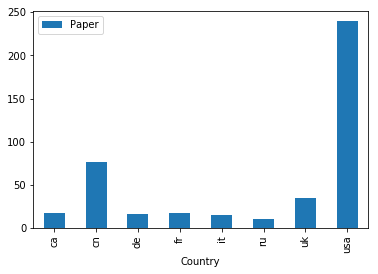

In [2481]:
plt.figure();
active_country_df.plot.bar();
plt.show();

with PdfPages('Rearch_Country.pdf') as pdf:
    plt.figure(figsize=(15,15))
    active_country_df.plot(kind='bar')#, column="Number",bins=10)
    plt.xlabel("Country",fontsize=15)
    plt.ylabel("Number of Publications",fontsize=15)
    plt.title('Country')
    pdf.savefig()
    plt.close()